# 과제 0623

## 유방암 데이터
### - 10, 5, 2 차원으로 차원 축소
### - 원본과 차원축소한 데이터의 분류 정확도 측정
### - 2차원으로 축소한 것은 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [3]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bc_std = scaler.fit_transform(bc.data)

### 1. 2차원으로 축소

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
bc_pca = pca.fit_transform(bc_std)

In [5]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [6]:
bc_pca_df = pd.DataFrame(bc_pca, columns=['PC1','PC2'])
bc_pca_df['target'] = bc.target
bc_pca_df.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


- 분류 정확도 측정

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
# 원본의 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    bc.data, bc.target, stratify = bc.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.9090909090909091

In [9]:
# 차원축소 후 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca, bc.target, stratify = bc.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.916083916083916

- 시각화

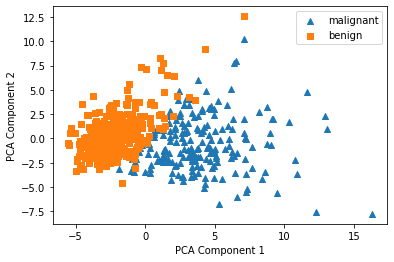

In [10]:
markers = ['^', 's']

for i, marker in enumerate(markers):
    x_axis_data = bc_pca_df[bc_pca_df.target == i]['PC1']
    y_axis_data = bc_pca_df[bc_pca_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=bc.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 2. 5차원으로 축소

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
bc_pca = pca.fit_transform(bc_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

- 분류 정확도 측정

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca, bc.target, stratify = bc.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.951048951048951

### 3. 10차원으로 축소

In [13]:
pca = PCA(n_components = 10)
bc_pca = pca.fit_transform(bc_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

- 분류 정확도 측정

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca, bc.target, stratify = bc.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.9790209790209791

### 4. 군집화하기 

In [15]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=2, random_state=2021)

kmeans.fit(bc_std)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [16]:
pca = PCA(n_components = 2)
bc_pca = pca.fit_transform(bc_std)

In [17]:
bc_pca_df = pd.DataFrame(bc_pca, columns=['PC1','PC2'])
bc_pca_df['target'] = bc.target
bc_pca_df['cluster'] = kmeans.labels_
bc_pca_df.head()

,PC1,PC2,target,cluster
0,9.192837,1.948583,0,0
1,2.387802,-3.768172,0,0
2,5.733896,-1.075174,0,0
3,7.122953,10.275589,0,0
4,3.935302,-1.948072,0,0


- 데이터 시각화: 비교 그림

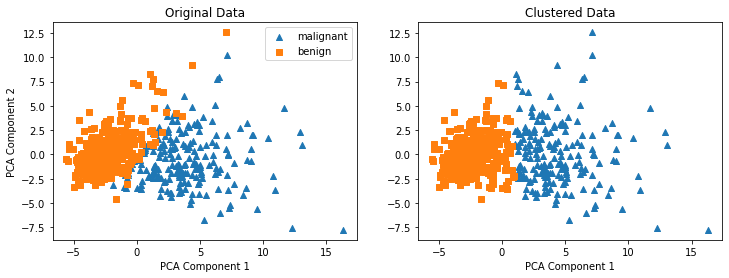

In [18]:
markers = ['^', 's']
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = bc_pca_df[bc_pca_df[column] == i]['PC1']
        y_axis_data = bc_pca_df[bc_pca_df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=bc.target_names[i])

    if k == 0:   # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else:      # cluster인 경우
        ax.set_title('Clustered Data')
    
    ax.set_xlabel('PCA Component 1')